In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

sns.set_theme(style="darkgrid")

freq = '19S'
w = 2592
h = 1944
n = len(os.listdir('yolov5/runs/detect/1012_2100/labels/'))

feeding_y_upper = 1165
feeding_y_lower = 1645
feeding_x_f1f2 = 233
feeding_x_f2f3 = 738
feeding_x_f3f4 = 1302
feeding_x_f4f5 = 1883
feeding_x_f5f6 = 2339

Chicken counting

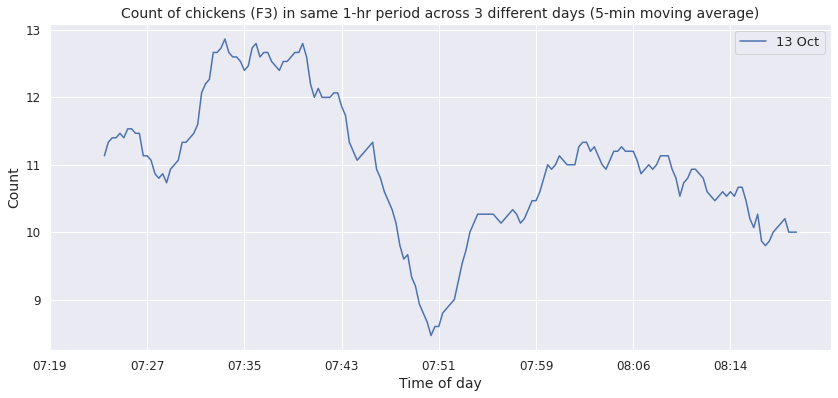

In [20]:
hour = '0700'
days = ['1013_','1015_','1017_']
# days = ['1013_']
region = 'F3'
tick_step = 25
rolling_window = 15

plt.figure(figsize=(14, 6))

# Loop through days
for day in days:
    start = hour[:2] + ":19:26"
    # Dataframe to store counts
    counts = pd.DataFrame(index=pd.date_range(start=start, periods=n, freq=freq), columns=['Total','Feeding','Not feeding','F1','F2','F3','F4','F5','F6'])

    for i in range(1, n+1):
        df = pd.read_csv('yolov5/runs/detect/{}{}/labels/2020{}{}_{}.txt'.format(day,hour,day,hour,i), header=None, sep=' ', usecols=[1,2], names=['x','y'])
        df['x'] = (df['x']*w).astype(int)
        df['y'] = (df['y']*h).astype(int)

        # Whole image
        counts.iloc[i-1,0] = len(df)
        # Not feeding
        not_feeding = len(df[(df['y']<feeding_y_upper)|(df['y']>feeding_y_lower)])
        counts.iloc[i-1,2] = not_feeding
        # Feeding
        counts.iloc[i-1,1] = len(df) - not_feeding

        c1 = df['y']>feeding_y_upper 
        c2 = df['y']<feeding_y_lower

        # F1
        c3 = df['x']<feeding_x_f1f2
        counts.iloc[i-1,3] = len(df[c1&c2&c3])
        # F2
        c4 = df['x']>feeding_x_f1f2
        c5 = df['x']<feeding_x_f2f3
        counts.iloc[i-1,4] = len(df[c1&c2&c4&c5])
        # F3
        c6 = df['x']>feeding_x_f2f3
        c7 = df['x']<feeding_x_f3f4
        counts.iloc[i-1,5] = len(df[c1&c2&c6&c7])
        # F4
        c8 = df['x']>feeding_x_f3f4
        c9 = df['x']<feeding_x_f4f5
        counts.iloc[i-1,6] = len(df[c1&c2&c8&c9])   
        # F5
        c10 = df['x']>feeding_x_f4f5
        c11 = df['x']<feeding_x_f5f6
        counts.iloc[i-1,7] = len(df[c1&c2&c10&c11])
        # F6
        c12 = df['x']>feeding_x_f5f6
        counts.iloc[i-1,8] = len(df[c1&c2&c12])
    
    counts['Time'] = counts.index.to_pydatetime()
    counts['Time'] = counts['Time'].apply(lambda x: str(datetime.datetime.time(x)))
    plt.plot(counts['Time'], counts[region].rolling(rolling_window).mean(), label= day[2:4]+' Oct')
    
plt.title('Count of chickens ({}) in same 1-hr period across 3 different days ({}-min moving average)'.format(region,int(rolling_window/3)), fontsize=14)
plt.legend(fontsize=13)
plt.xticks(ticks=counts['Time'][::tick_step], labels=[t[:-3] for t in counts['Time'][::tick_step]], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.axhline(y=14, color='r', linestyle='-')
# plt.annotate('Max trough slots', (80, 13.5), c='r', fontsize=14, weight='bold')
plt.show()
# plt.savefig('count_F3_3days.png')

In [22]:
counts

,Total,Feeding,Not feeding,F1,F2,F3,F4,F5,F6,Time
2022-04-07 07:19:26,175,51,124,5,11,10,7,10,8,07:19:26
2022-04-07 07:19:45,179,54,125,8,11,11,9,6,9,07:19:45
2022-04-07 07:20:04,185,51,134,5,9,12,9,7,9,07:20:04
2022-04-07 07:20:23,179,48,131,5,8,10,7,11,7,07:20:23
2022-04-07 07:20:42,175,47,128,5,9,11,7,8,7,07:20:42
...,...,...,...,...,...,...,...,...,...,...
2022-04-07 08:18:58,136,51,85,5,10,12,6,7,11,08:18:58
2022-04-07 08:19:17,132,49,83,3,9,10,7,8,12,08:19:17
2022-04-07 08:19:36,126,40,86,4,7,7,7,6,9,08:19:36
2022-04-07 08:19:55,129,43,86,6,6,9,8,5,9,08:19:55


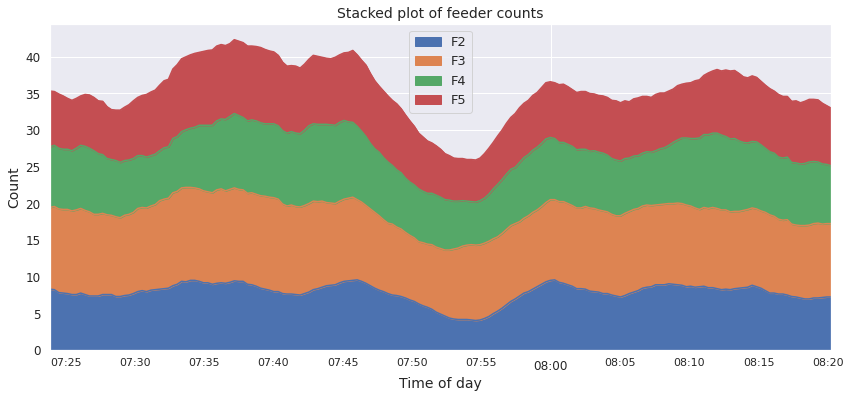

In [53]:
counts[['F2','F3','F4','F5']].rolling(15).mean()[14:].plot.area(figsize=(14,6))
plt.title('Stacked plot of feeder counts', fontsize=14)
plt.legend(fontsize=13)
plt.xlabel('Time of day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.show()
plt.savefig('count_stacked.png')